# STEP 1: DATA COLLECTION

# STEP 2: DATA PREPROCESSING/ DATA WRANGLING

IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_9d750cc572a946a1aa22eeb94a45c58f = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_9d750cc572a946a1aa22eeb94a45c58f = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_9d750cc572a946a1aa22eeb94a45c58f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XKj2TQISLTaxfuxxbVQnH0awhq-oqSsqxZY_maa57ysq',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_9d750cc572a946a1aa22eeb94a45c58f)

body = client_9d750cc572a946a1aa22eeb94a45c58f.get_object(Bucket='carseries-donotdelete-pr-yllvezhwcxyq4x',Key='monthly-car-sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()


,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [3]:
dataset.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


In [4]:
dataset.head(10)

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
5,1960-06,13791
6,1960-07,9498
7,1960-08,8251
8,1960-09,7049
9,1960-10,9545


In [5]:
dataset['year'] = pd.DatetimeIndex(dataset['Month']).year
dataset['month'] = pd.DatetimeIndex(dataset['Month']).month
#dataset['day'] = pd.DatetimeIndex(dataset['Date']).day

In [6]:
dataset.head()

,Month,Sales,year,month
0,1960-01,6550,1960,1
1,1960-02,8728,1960,2
2,1960-03,12026,1960,3
3,1960-04,14395,1960,4
4,1960-05,14587,1960,5


In [7]:
dataset.corr()

,Sales,year,month
Sales,1.000000,5.804182e-01,-1.337683e-01
year,0.580418,1.000000e+00,1.391750e-14
month,-0.133768,1.391750e-14,1.000000e+00


Dropping Date Column, Because we already splitted the Date into Year, Month and Day

In [8]:
dataset.drop('Month', axis=1, inplace=True)

Checking for null values

In [9]:
dataset.isnull().any()

Sales    False
year     False
month    False
dtype: bool

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   108 non-null    int64
 1   year    108 non-null    int64
 2   month   108 non-null    int64
dtypes: int64(3)
memory usage: 2.7 KB


HANDLING MISSING VALUES

No handles with labels found to put in legend.


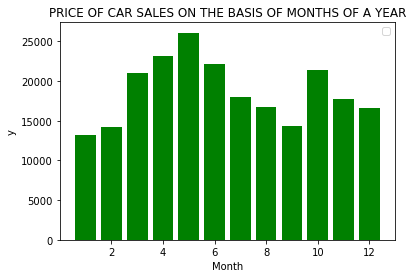

In [11]:
import matplotlib.pyplot as plt
plt.bar(dataset['month'],dataset['Sales'],color='green')
plt.xlabel('Month')
plt.ylabel('y')
plt.title('PRICE OF CAR SALES ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

<AxesSubplot:xlabel='year', ylabel='Sales'>

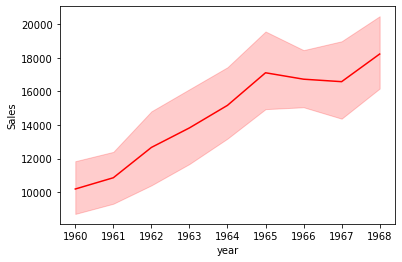

In [12]:
import seaborn as sns
sns.lineplot(x='year',y='Sales',data=dataset,color='red')

No handles with labels found to put in legend.


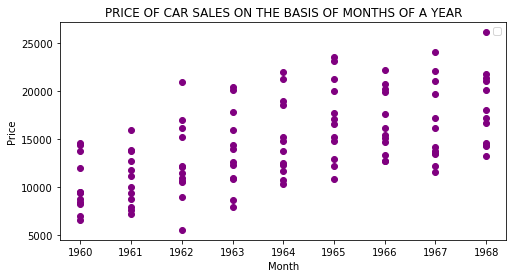

In [13]:
fig=plt.figure(figsize=(8,4))
plt.scatter(dataset['year'],dataset['Sales'],color='purple')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF CAR SALES ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

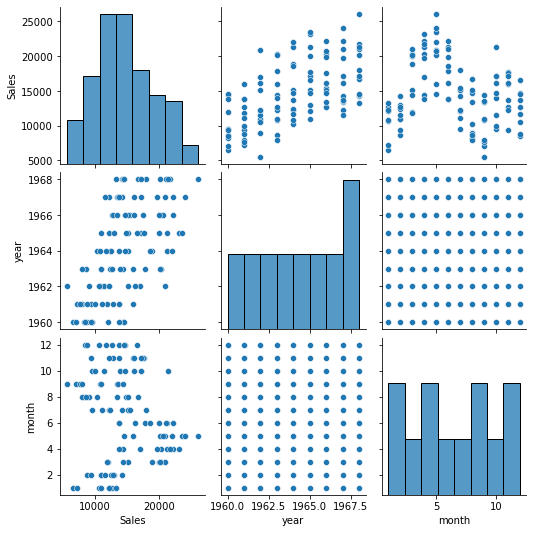

In [14]:
import seaborn as sns
sns.pairplot(dataset)
plt.show()

IT IS NOT NECESSARY TO APPLY LABEL ENCODING AND ONE HOT ENCODING AS THE DATASET DOES NOT CONTAIN ANY TEXTUAL DATA

SPLIT DATASET INTO INPUTS AND OUTPUTS

Now, Split the dataset into X(independent variable) and Y(dependent variable)

In [15]:
x=dataset.iloc[:,1:3].values #inputs
y=dataset.iloc[:,0:1].values #output price only

In [16]:
x

array([[1960,    1],
       [1960,    2],
       [1960,    3],
       [1960,    4],
       [1960,    5],
       [1960,    6],
       [1960,    7],
       [1960,    8],
       [1960,    9],
       [1960,   10],
       [1960,   11],
       [1960,   12],
       [1961,    1],
       [1961,    2],
       [1961,    3],
       [1961,    4],
       [1961,    5],
       [1961,    6],
       [1961,    7],
       [1961,    8],
       [1961,    9],
       [1961,   10],
       [1961,   11],
       [1961,   12],
       [1962,    1],
       [1962,    2],
       [1962,    3],
       [1962,    4],
       [1962,    5],
       [1962,    6],
       [1962,    7],
       [1962,    8],
       [1962,    9],
       [1962,   10],
       [1962,   11],
       [1962,   12],
       [1963,    1],
       [1963,    2],
       [1963,    3],
       [1963,    4],
       [1963,    5],
       [1963,    6],
       [1963,    7],
       [1963,    8],
       [1963,    9],
       [1963,   10],
       [1963,   11],
       [1963,

In [17]:
y

array([[ 6550],
       [ 8728],
       [12026],
       [14395],
       [14587],
       [13791],
       [ 9498],
       [ 8251],
       [ 7049],
       [ 9545],
       [ 9364],
       [ 8456],
       [ 7237],
       [ 9374],
       [11837],
       [13784],
       [15926],
       [13821],
       [11143],
       [ 7975],
       [ 7610],
       [10015],
       [12759],
       [ 8816],
       [10677],
       [10947],
       [15200],
       [17010],
       [20900],
       [16205],
       [12143],
       [ 8997],
       [ 5568],
       [11474],
       [12256],
       [10583],
       [10862],
       [10965],
       [14405],
       [20379],
       [20128],
       [17816],
       [12268],
       [ 8642],
       [ 7962],
       [13932],
       [15936],
       [12628],
       [12267],
       [12470],
       [18944],
       [21259],
       [22015],
       [18581],
       [15175],
       [10306],
       [10792],
       [14752],
       [13754],
       [11738],
       [12181],
       [12965],
       [

SPLIT THE DATA INTO TRAIN AND TEST SETS

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                        test_size=0.2,random_state=0)

In [19]:
x_train.shape

(86, 2)

In [20]:
x_test.shape

(22, 2)

# STEP 4: BUILDING AND TESTING THE MODEL

MULTIPLE LINEAR REGRESSION

In [21]:
#importing linear regression from scikit learn library
from sklearn.linear_model import LinearRegression
#mlr is object of LinearRegression
mlr=LinearRegression()
#trainig the model using fit method
mlr.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred=mlr.predict(x_test)

In [23]:
y_pred

array([[19054.89242864],
       [ 9542.22369668],
       [17336.67504119],
       [11371.20768227],
       [13893.15046437],
       [19172.74882869],
       [17572.3878413 ],
       [10228.09269127],
       [11946.31007872],
       [18597.64643224],
       [15161.21165734],
       [10574.57208953],
       [12867.89187343],
       [16990.19564293],
       [17108.05204299],
       [15043.35525728],
       [12632.17907332],
       [17793.92103759],
       [18826.26943044],
       [14586.10926088],
       [18486.8798341 ],
       [ 9999.46969308]])

In [24]:
y_test

array([[12225],
       [ 9364],
       [22135],
       [12026],
       [10677],
       [26099],
       [14577],
       [ 8251],
       [15926],
       [20985],
       [10895],
       [12759],
       [13932],
       [12181],
       [20677],
       [22015],
       [ 9374],
       [12760],
       [11608],
       [15175],
       [16722],
       [ 7049]])

In [25]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)

In [26]:
accuracy

0.31563714627354245

Note: The accuracy obtained using the Multilinear Regression Algorithm is very low...Therefore we will not use this algorithm

DECISION TREE REGRESSOR

In [27]:
#import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
#fitting the model or training the model
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

PREDICTION

In [28]:
y_pred=dtr.predict(x_test)

In [29]:
y_pred

array([12674.,  9545., 23125., 11837., 10862., 24081., 17180.,  7975.,
       13784., 20249., 13401., 10015., 15936., 12674., 23541., 21259.,
        8728., 12965., 12965., 12268., 13434.,  7610.])

In [30]:
y_test

array([[12225],
       [ 9364],
       [22135],
       [12026],
       [10677],
       [26099],
       [14577],
       [ 8251],
       [15926],
       [20985],
       [10895],
       [12759],
       [13932],
       [12181],
       [20677],
       [22015],
       [ 9374],
       [12760],
       [11608],
       [15175],
       [16722],
       [ 7049]])

ACCURACY EVALUATION

In [31]:
from sklearn.metrics import r2_score
dtraccuracy=r2_score(y_test,y_pred)

In [32]:
dtraccuracy

0.8783651352196062

RANDOM VALUE PREDICTION

In [33]:
dataset.head()

,Sales,year,month
0,6550,1960,1
1,8728,1960,2
2,12026,1960,3
3,14395,1960,4
4,14587,1960,5


In [34]:
y_p=dtr.predict([[2005,12]])

In [35]:
y_p

array([17180.])

In [36]:
y_p=dtr.predict([[1997,1]])

In [37]:
y_p

array([13210.])

In [38]:
import pickle
pickle.dump(dtr,open('sales.pkl','wb'))

In [39]:
pwd

'/home/wsuser/work'

# Deployment

URLS Dallas: https://us-south.ml.cloud.ibm.com, London - https://eu-gb.ml.cloud.ibm.com, Frankfurt - https://eu-de.ml.cloud.ibm.com, Tokyo - https://jp-tok.ml.cloud.ibm.com

# Import and Install dependencies

In [40]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.8 MB 27.8 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.176
    Uninstalling ibm-watson-machine-learning-1.0.176:
      Successfully uninstalled ibm-watson-machine-learning-1.0.176


In [41]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

# Authenticate and Set space

In [42]:
wml_credentials = {
    "apikey":"Dnr8pZzKw-pKWsc_zxaS_5HCs9oslwvd5cFfdGrMriYE",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [43]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------  ------------------------
ID                                    NAME          CREATED
7f302674-b2a7-49e2-93d4-fed45335a7df  Sales_deploy  2022-01-21T06:53:12.796Z
------------------------------------  ------------  ------------------------


In [44]:
SPACE_ID="7f302674-b2a7-49e2-93d4-fed45335a7df"

In [45]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [46]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

# Save and Deploy Model

In [47]:
import sklearn
sklearn.__version__


'0.23.2'

In [48]:
MODEL_NAME = 'car_model'
DEPLOYMENT_NAME = 'Sales_deploy'
CS_MODEL = dtr

In [49]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('default_py3.8')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [50]:
#Save model
model_details = wml_client.repository.store_model(
    model=CS_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

In [51]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l0',
  'software_spec': {'id': 'ab9e1b80-f2ce-592c-a7d2-4f2344f77194',
   'name': 'default_py3.8'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'f0', 'type': 'int'},
      {'name': 'f1', 'type': 'int'}],
     'id': '1',
     'type': 'ndarray'},
    'type': 's3'}],
  'type': 'scikit-learn_0.23'},
 'metadata': {'created_at': '2022-01-21T12:04:11.191Z',
  'id': 'df2681ac-e941-4753-89d0-068e724821ef',
  'modified_at': '2022-01-21T12:04:13.736Z',
  'name': 'car_model',
  'owner': 'IBMid-664002W3U0',
  'resource_key': 'b97743c2-d716-4b1e-baa9-7fa4c735e610',
  'space_id': '7f302674-b2a7-49e2-93d4-fed45335a7df'},
 'system': {'warnings': []}}

In [52]:
model_uid = wml_client.repository.get_model_uid(model_details); model_uid

'df2681ac-e941-4753-89d0-068e724821ef'

In [53]:
wml_client.connections.list_datasource_types()

-------------------------  ------------------------------------  --------  ------
NAME                       DATASOURCE_ID                         TYPE      STATUS
informix                   029e5d1c-ba73-4b09-b742-14c3a39b6cf9  database  active
postgresql-ibmcloud        048ed1bf-516c-46f0-ae90-fa3349d8bc1c  database  active
googlecloudstorage         05b7f0ea-6ae4-45e2-a455-cc280f110825  file      active
impala                     05c58384-862e-4597-b19a-c71ea7e760bc  database  active
salesforce                 06847b16-07b4-4415-a924-c63d11a17aa1  database  active
datastax-ibmcloud          0bd5946b-6fcb-4253-bf76-48b362d24a89  database  active
cosmos                     0c431748-2572-11ea-978f-2e728ce88125  file      active
odbc-datastage             0ca92c3d-0e46-3b42-a573-77958d53c9be  database  active
mysql-compose              0cd4b64c-b485-47ed-a8c4-329c25412de3  database  active
hive                       0fd83fe5-8995-4e2e-a1be-679bb8813a6d  database  active
cognos-analytics

In [54]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}



In [ ]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)





#######################################################################################

Synchronous deployment creation for uid: 'df2681ac-e941-4753-89d0-068e724821ef' started

#######################################################################################


initializing